## <center> CROSS VALIDATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR

In [3]:
data = pd.read_csv('./possum.csv')
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
data.shape

(104, 14)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [7]:
data.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

### Filling the null values

In [8]:
data.age.fillna(data.age.mean(), inplace= True)
data.footlgth.fillna(data.age.mean(), inplace=True)
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [9]:
data.isnull().mean()*100

case        0.0
site        0.0
Pop         0.0
sex         0.0
age         0.0
hdlngth     0.0
skullw      0.0
totlngth    0.0
taill       0.0
footlgth    0.0
earconch    0.0
eye         0.0
chest       0.0
belly       0.0
dtype: float64

### Univariate Analysis

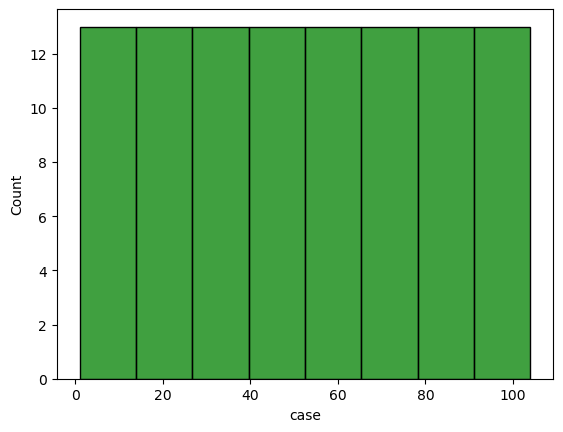

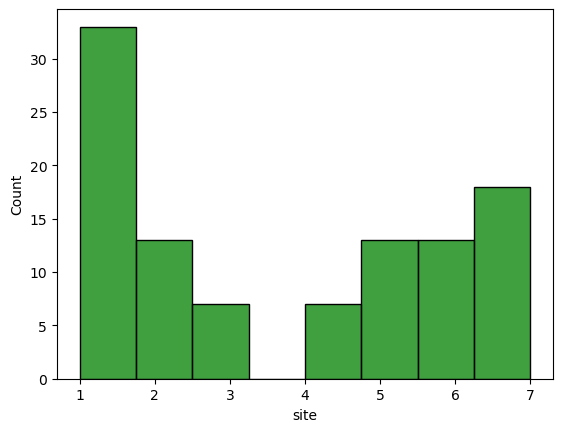

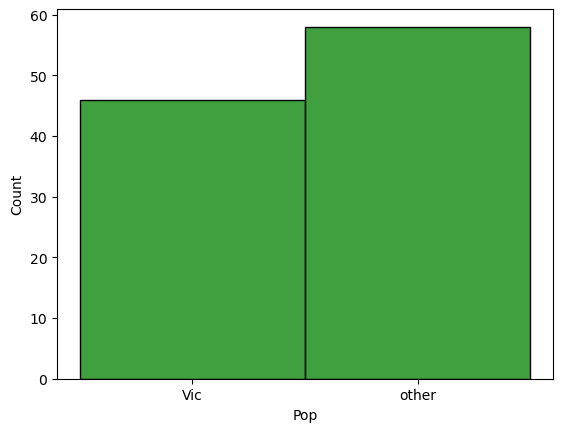

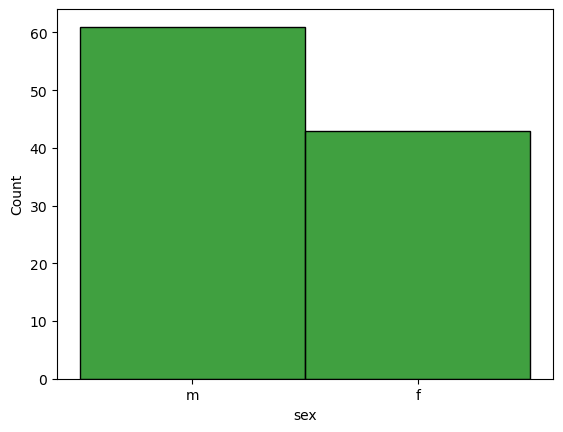

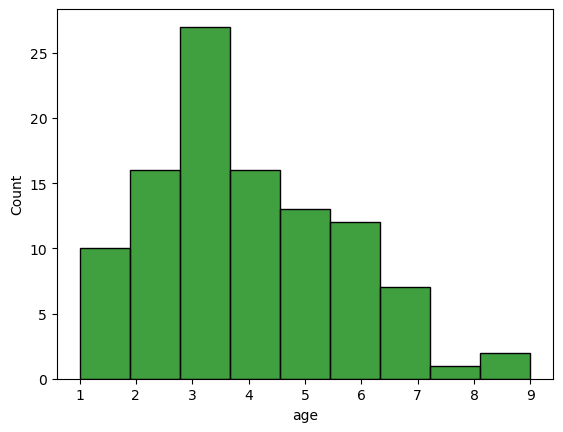

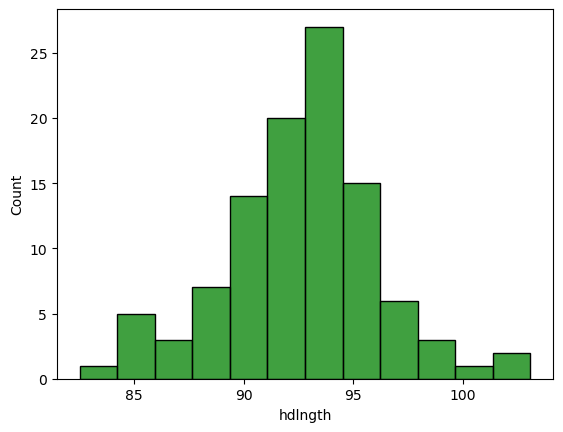

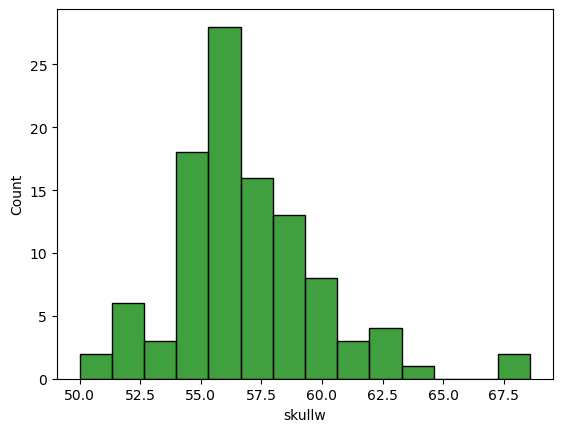

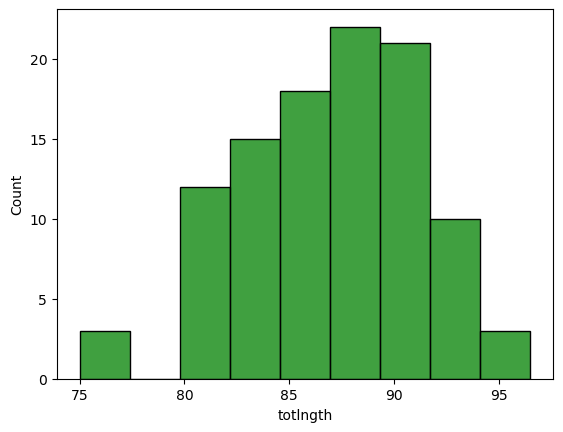

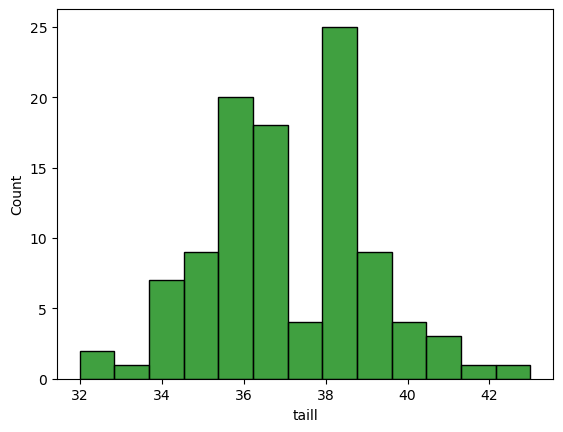

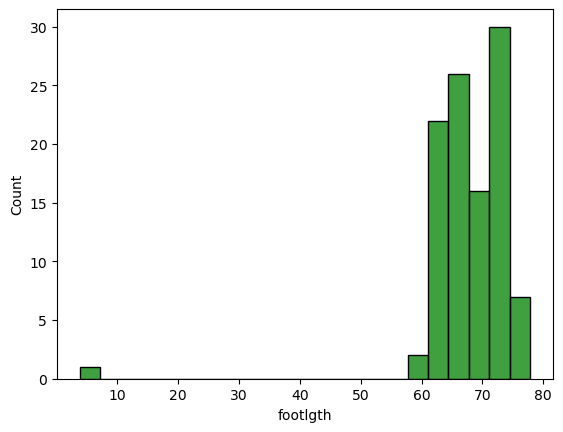

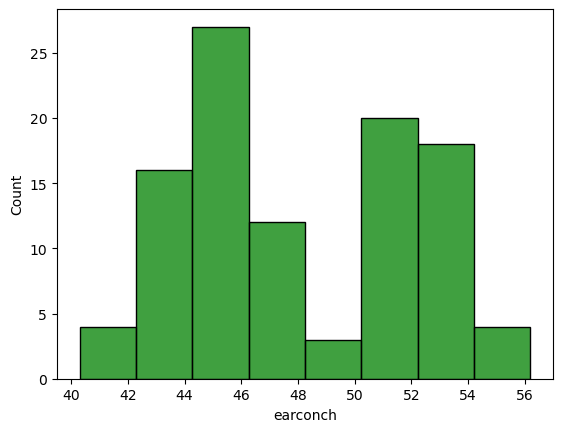

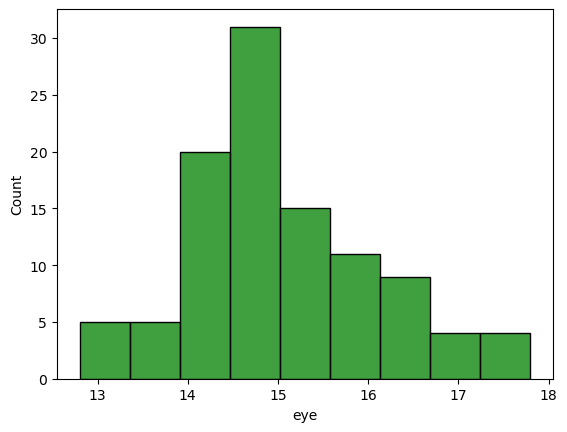

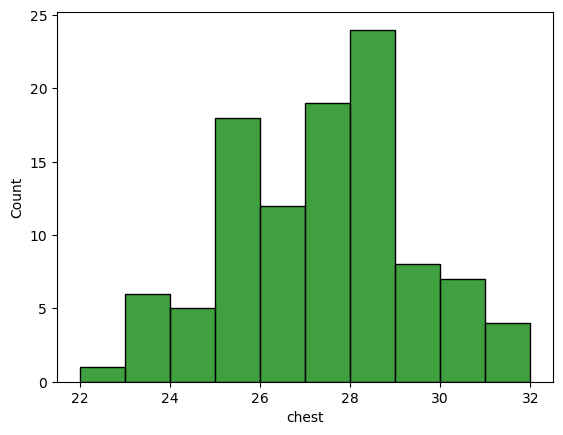

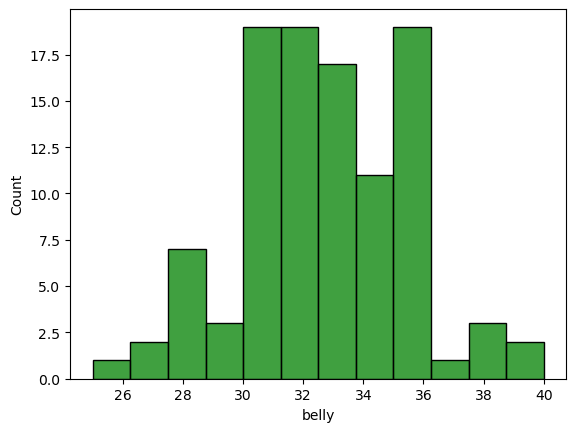

In [13]:
for i in data.columns:
    if data[i].dtypes !="objects":
        sns.histplot(x=data[i] , color='green')
        plt.show()

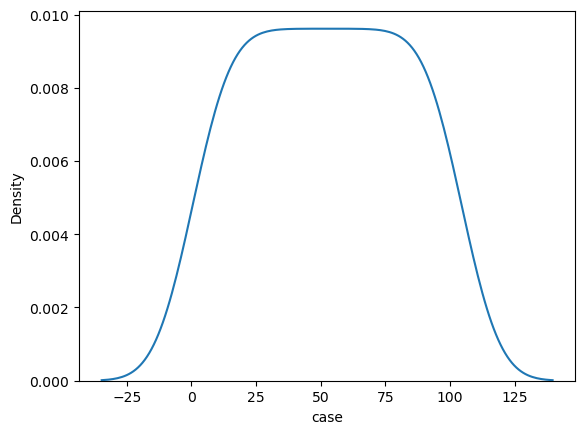

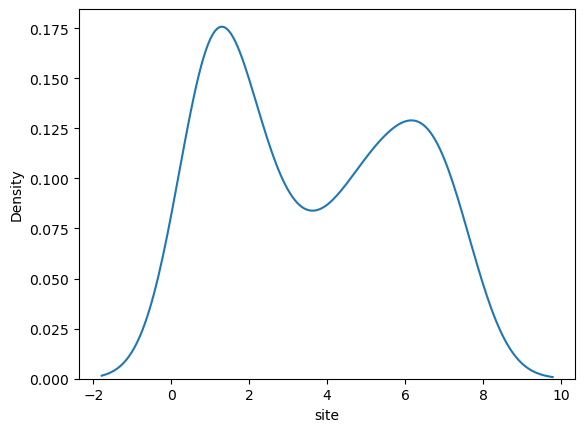

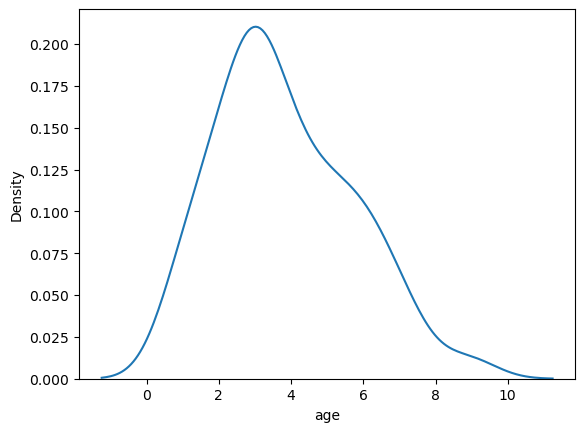

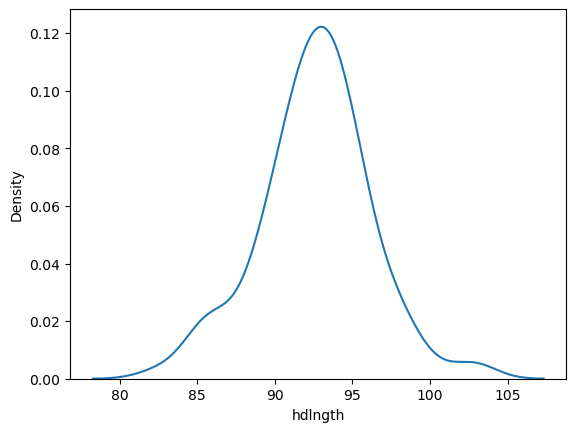

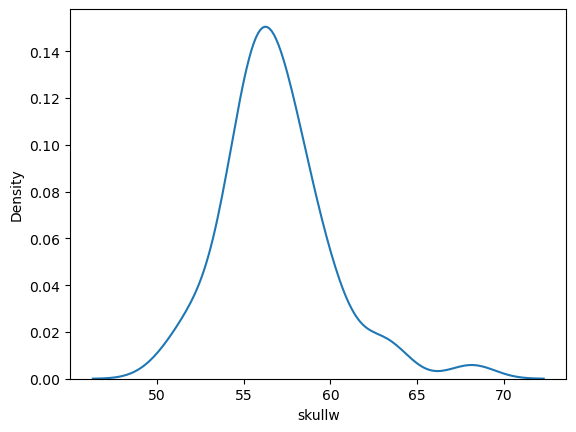

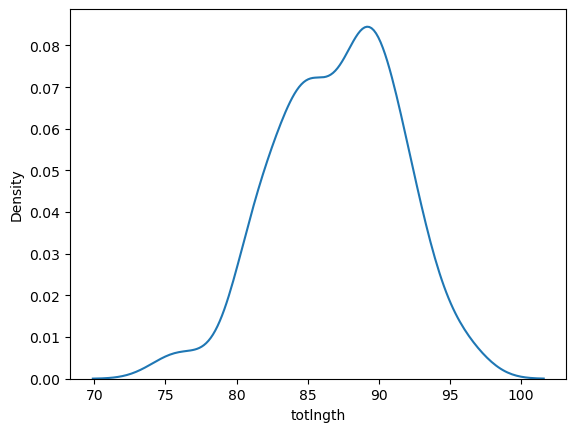

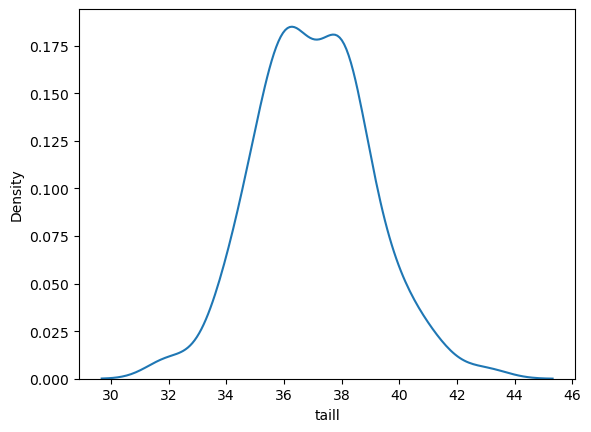

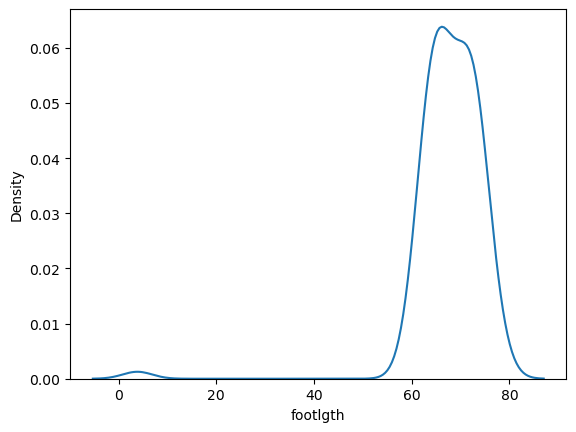

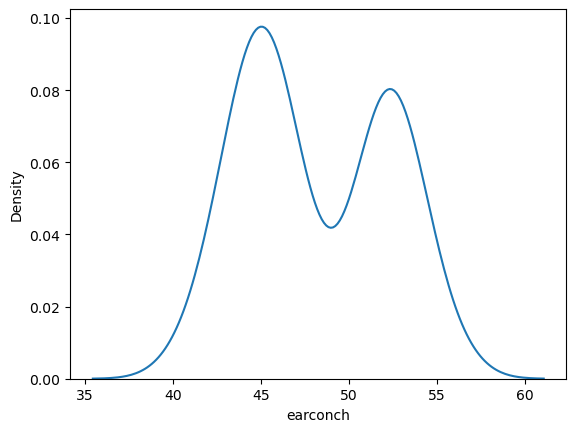

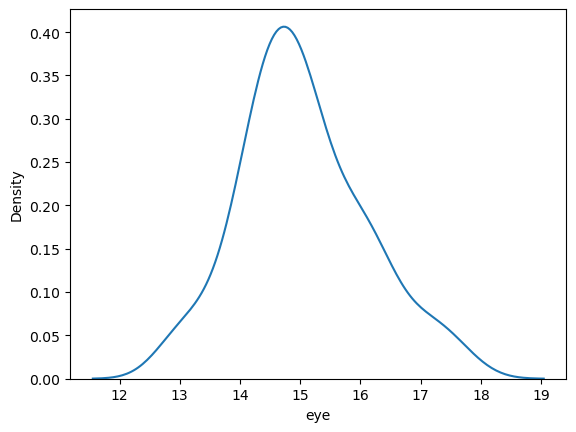

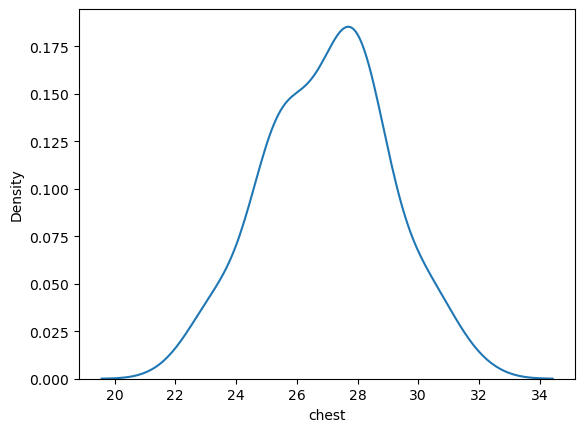

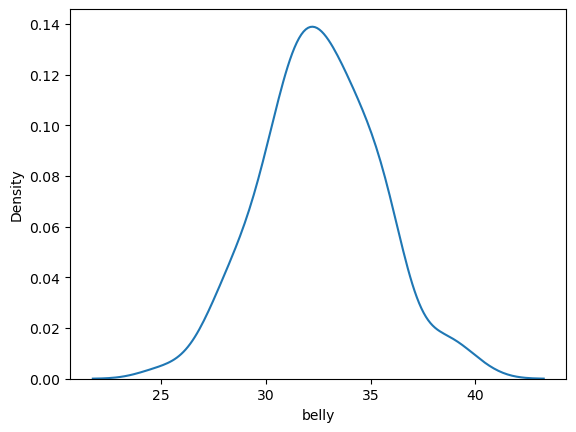

In [14]:
for i in  data.columns:
    if data[i].dtypes !="object":
        sns.kdeplot(x =data[i])
        plt.show()

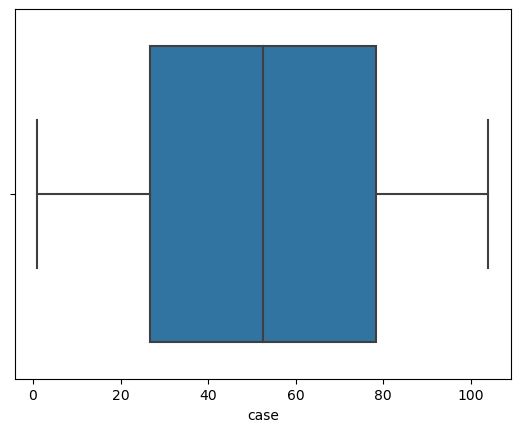

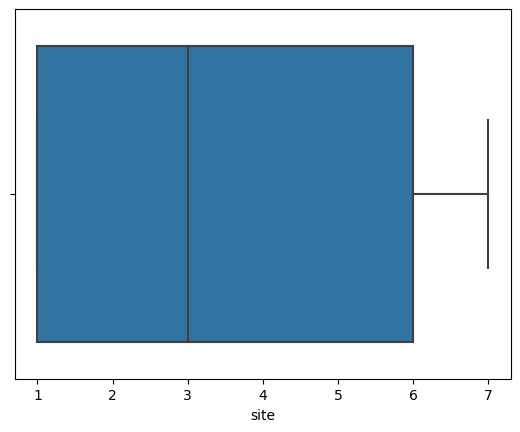

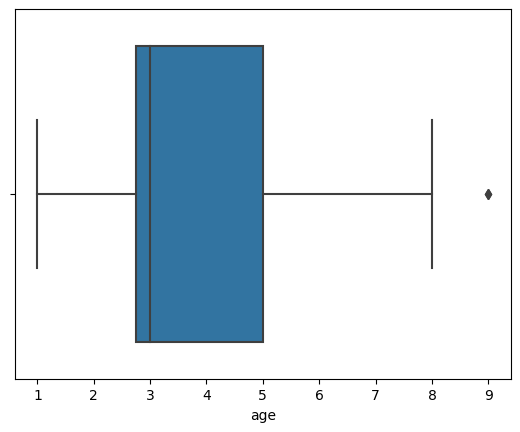

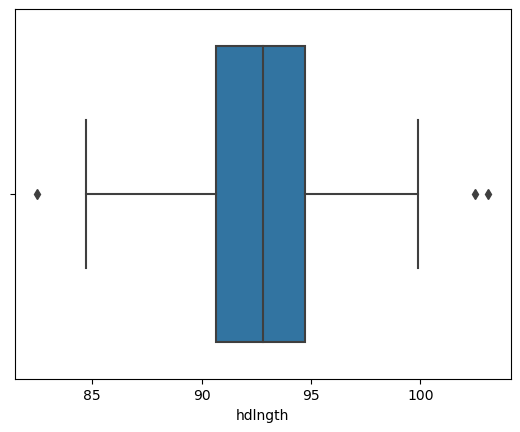

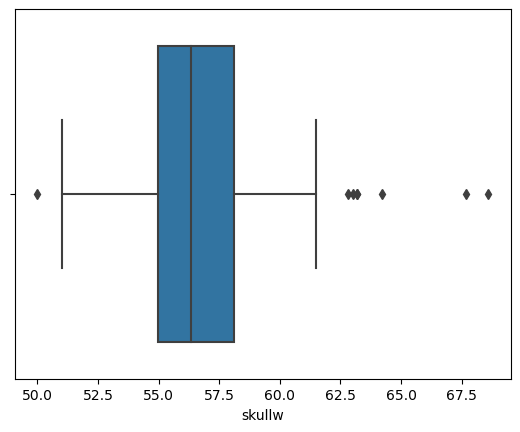

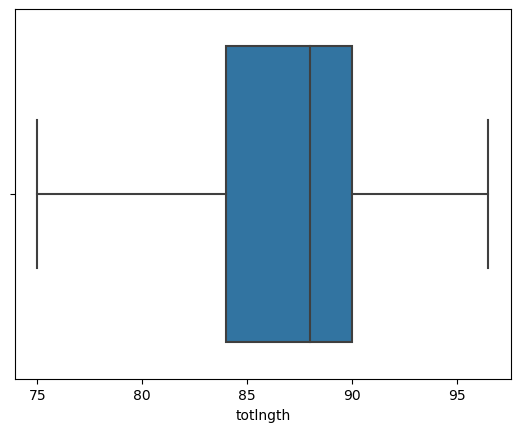

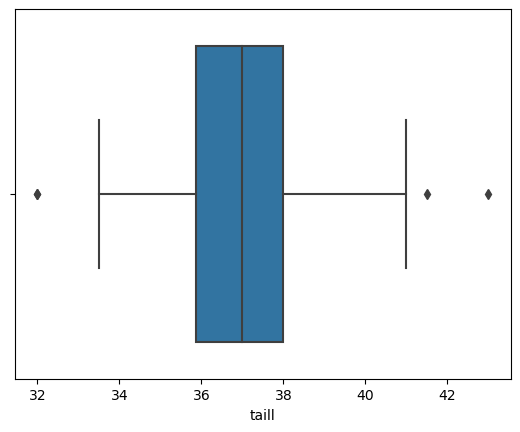

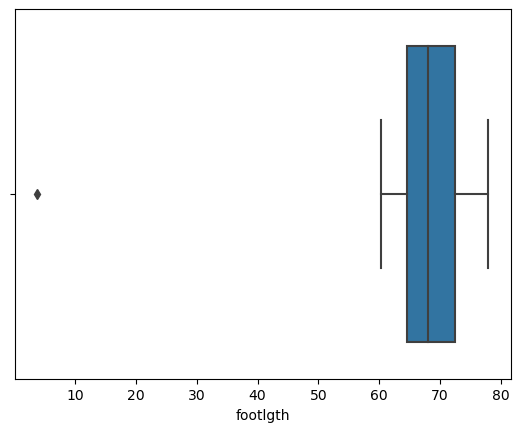

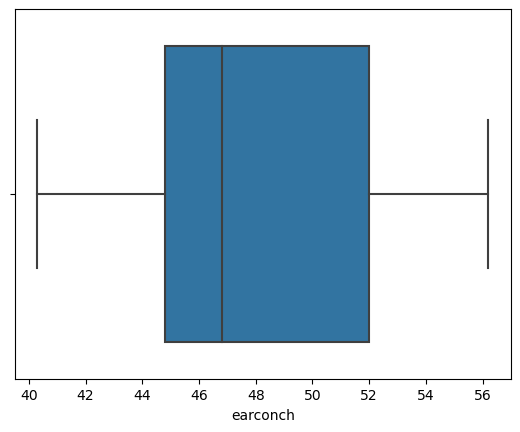

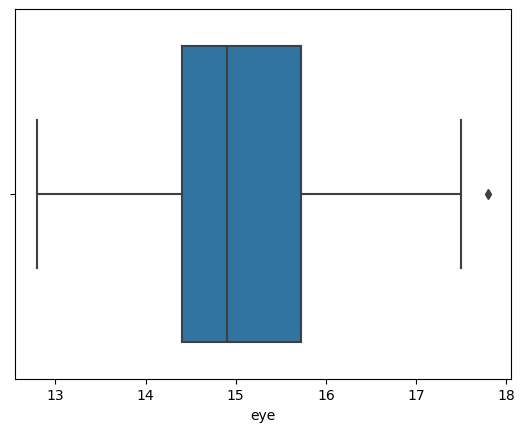

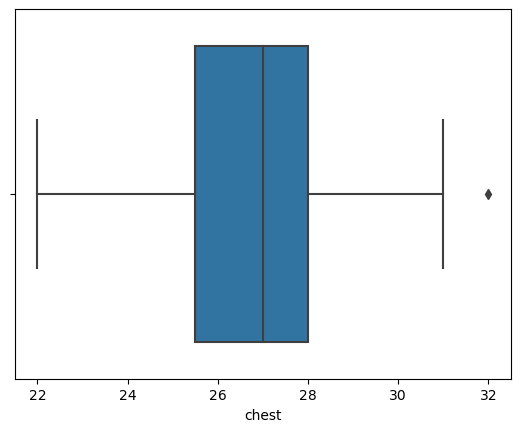

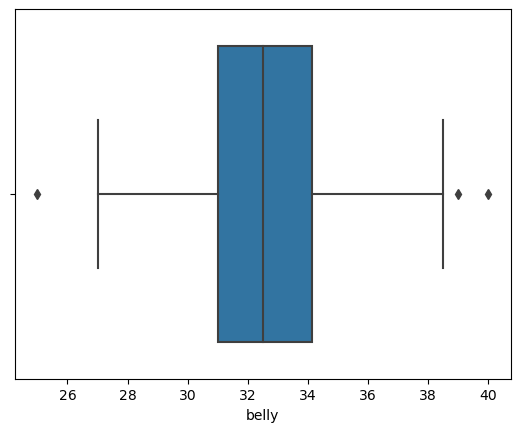

In [15]:
for i in  data.columns:
    if data[i].dtypes !="object":
        sns.boxplot(x =data[i])
        plt.show()

### Label encoding the categorical columns

In [16]:
le = LabelEncoder()

In [17]:
data['Pop'] = le.fit_transform(data['Pop'])


In [18]:
data['sex'] = le.fit_transform(data['sex'])

### Checking the correlation with target'footlgth'

<AxesSubplot:>

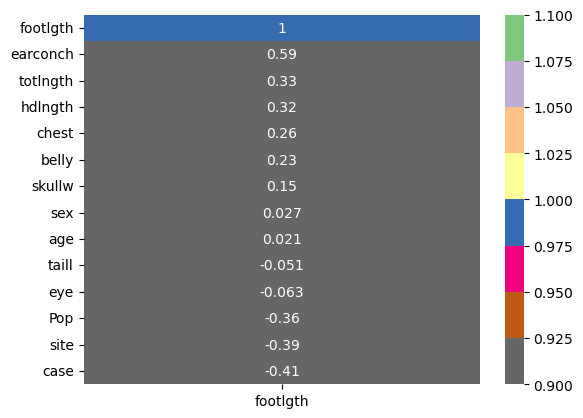

In [28]:
sns.heatmap(data.corr()[["footlgth"]].sort_values(by='footlgth', ascending=False),vmax= 1,vmin = 1,annot = True,cmap= 'Accent_r')

### Lets take only the columns with good correlation with the target

In [29]:
x= data[['hdlngth','skullw', 'totlngth', 'earconch', 'chest', 'belly']].values

In [30]:
y=data[['footlgth']].values

### Feature Scalling

In [31]:
rs = RobustScaler()

In [32]:
x=rs.fit_transform(x)

###  Model Building 

In [34]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradiantBoosterRegressor":GradientBoostingRegressor(),
    "AdaBoostingRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

In [39]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rsme = np.sqrt(-scores)
    rsme_average = np.mean(rsme)
    print("AVERAGE RSME: ",rsme_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RSME:  4.327341614174546
****************************************************************************************************
cross validation model : Ridge
AVERAGE RSME:  4.244731706188273
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RSME:  5.898531089631951
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RSME:  4.214304771033394
****************************************************************************************************
cross validation model : GradiantBoosterRegressor
AVERAGE RSME:  3.835141240120258
****************************************************************************************************
cross validation model : AdaBoostingRegressor
AVERAGE RSME:  3.857772148692942
**********************************************

### Model Bulding

In [40]:
model= RandomForestRegressor()


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, shuffle = True)
x_test.shape

(21, 6)

In [43]:
model.fit(x_train, y_train)

RandomForestRegressor()

### Prediction using the test data

In [44]:
y_pred = model.predict(x_test)
y_pred

array([72.975, 65.122, 66.089, 67.798, 69.997, 65.489, 64.368, 68.625,
       71.692, 73.25 , 73.405, 75.001, 65.812, 64.655, 63.929, 71.506,
       65.073, 71.612, 71.34 , 70.27 , 65.138])

### Evaluate the Accuracy

In [45]:
r2_score=y_test,y_pred

### Testing Accuracy

In [46]:
model.score(x_test, y_test)

0.6909761174053204

### Taining Accuracy

In [48]:
model.score(x_train, y_train)

0.8730046471423254

### MAE

In [49]:
mean_absolute_error(y_test, y_pred)

1.7113333333333178

### MSE

In [50]:
mean_squared_error(y_test, y_pred)

5.2040602857142755

### Root mean Squared error

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.2812409530153266

### Creating dataframe with y_pred and y_test

In [54]:
Output = pd.DataFrame(zip(y_test, y_pred), columns=['Actual', 'Prediction'])
Output.head()

,Actual,Prediction
0,[68.0],72.975
1,[63.2],65.122
2,[68.2],66.089
3,[71.3],67.798
4,[72.8],69.997


In [56]:
Output=Output.astype('float64')
Output.head()

,Actual,Prediction
0,68.0,72.975
1,63.2,65.122
2,68.2,66.089
3,71.3,67.798
4,72.8,69.997


### Plotting the Result

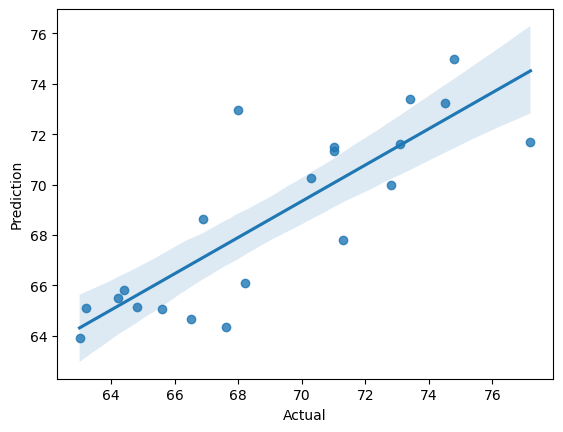

In [57]:
sns.regplot(data=Output, x='Actual', y='Prediction')
plt.show()